In [1]:
import pandas as pd

from datetime import datetime
# Display figures inline in Jupyter notebook
import matplotlib.pyplot as plt
import seaborn as sn
# Use seaborn style defaults and set the default figure size
sn.set(rc={'figure.figsize':(11, 4)})


In [2]:
# !pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# Reading  the data files

In [3]:
events=pd.read_csv('events.csv')

In [4]:
events.head(5)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [5]:
category_tree=pd.read_csv('category_tree.csv')

In [6]:
category_tree.head(5)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [7]:
category_tree.shape

(1669, 2)

In [8]:
category_tree.parentid.nunique()

362

In [9]:
item_prop=pd.read_csv('item_properties_part1.csv')
item_prop2=pd.read_csv('item_properties_part2.csv')

In [10]:
item_props=pd.concat([item_prop,item_prop2],ignore_index=True)

In [11]:
item_props.head(5)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [12]:
item_props.dtypes

timestamp     int64
itemid        int64
property     object
value        object
dtype: object

In [13]:
item_props=item_props.sort_values(by='timestamp')

Change timestamp to date-time format i tried to convert it directly but it gave me DateTime in the future so i divided the value by 1000 before converting it to be reasonable. maybe it's  wrong but I did this just to be  readable

In [14]:
item_props['timestamp']=item_props['timestamp'].apply( lambda x: datetime.fromtimestamp(x/1000))

In [15]:
item_props.shape

(20275902, 4)

In [16]:
item_props.itemid.nunique()

417053

In [17]:
item_props

,timestamp,itemid,property,value
5903679,2015-05-10 05:00:00,317951,790,n32880.000
5668945,2015-05-10 05:00:00,422842,480,1133979
11314219,2015-05-10 05:00:00,310185,776,103591
15170322,2015-05-10 05:00:00,110973,112,679677
15170323,2015-05-10 05:00:00,179597,available,0
...,...,...,...,...
9472989,2015-09-13 05:00:00,364708,928,769062
9473006,2015-09-13 05:00:00,231604,888,561561 1055803 447378 n12.000 1135780 1284577 ...
2199697,2015-09-13 05:00:00,161357,888,12762 16970 145048 237874 1229126 784581 12977...
9472887,2015-09-13 05:00:00,267142,available,0


# Exploring  properties of  items  over time

In [18]:
item_props=item_props.set_index('timestamp')

In [19]:
item_props=item_props.sort_values(by=['timestamp', 'itemid','property', 'value'])

In [20]:
item_props

,itemid,property,value
timestamp,,,
2015-05-10 05:00:00,0,159,519769
2015-05-10 05:00:00,0,283,66094 372274 478989
2015-05-10 05:00:00,0,6,1152934 1238769
2015-05-10 05:00:00,0,678,372274
2015-05-10 05:00:00,0,790,n91200.000
...,...,...,...
2015-09-13 05:00:00,466864,790,n111840.000
2015-09-13 05:00:00,466864,813,1148082 353870 1262739
2015-09-13 05:00:00,466864,888,1262739 205682 1050016 1154859


#  Most frequently changed  properties 


from the  below  code  we  find  properties  <b>888,790,available,categoryid,451 </b>the most frequently changed  properties

In [21]:
# item_props[item_props.duplicated(['itemid','property'])].property.value_counts()

<AxesSubplot:ylabel='property'>

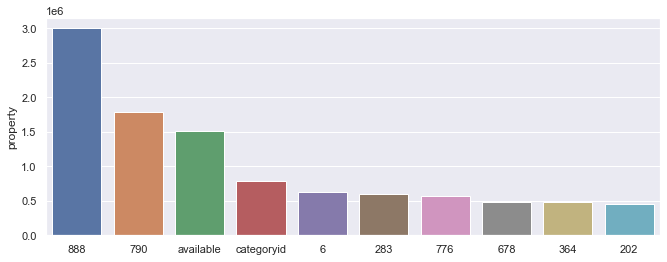

In [22]:

sn.barplot(x=item_props.property.value_counts().index[0:10], y=item_props.property.value_counts()[0:10])

get the changed items over time 

In [23]:
changed_items=item_props[item_props.duplicated(['itemid','property'])]
changed_items

,itemid,property,value
timestamp,,,
2015-05-17 05:00:00,0,6,1152934 1238769
2015-05-17 05:00:00,1,790,n5760.000
2015-05-17 05:00:00,1,888,172646
2015-05-17 05:00:00,1,available,0
2015-05-17 05:00:00,3,283,138228 150169 1182824 327918 261419
...,...,...,...
2015-09-13 05:00:00,466864,790,n111840.000
2015-09-13 05:00:00,466864,813,1148082 353870 1262739
2015-09-13 05:00:00,466864,888,1262739 205682 1050016 1154859


# listing the items that have different category over time

In [24]:
changed_items[changed_items['property']=='categoryid']

,itemid,property,value
timestamp,,,
2015-05-17 05:00:00,25,categoryid,1509
2015-05-17 05:00:00,94,categoryid,1147
2015-05-17 05:00:00,130,categoryid,1277
2015-05-17 05:00:00,149,categoryid,1120
2015-05-17 05:00:00,168,categoryid,1006
...,...,...,...
2015-09-13 05:00:00,466738,categoryid,1617
2015-09-13 05:00:00,466767,categoryid,1114
2015-09-13 05:00:00,466768,categoryid,1244


let's check  frist item <b> 393623</b> and property <b>categoryid</b>

In [25]:
# item_props[(item_props['itemid']==369722) &(item_props['property']=='categoryid')]['value']

<AxesSubplot:xlabel='timestamp'>

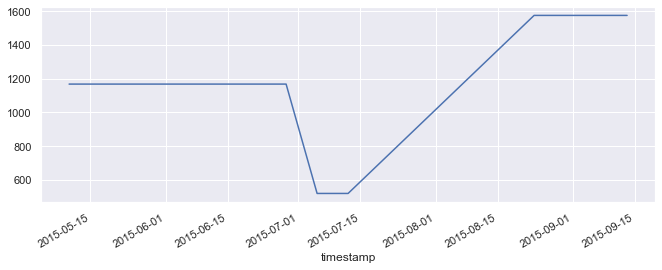

In [26]:
item_props[(item_props['itemid']==393623) &(item_props['property']=='categoryid')]['value'].astype(int).plot(grid='True')

# the changes in items avaiablibty over time

In [27]:
changed_items[changed_items['property']=='available']

,itemid,property,value
timestamp,,,
2015-05-17 05:00:00,1,available,0
2015-05-17 05:00:00,6,available,1
2015-05-17 05:00:00,15,available,1
2015-05-17 05:00:00,16,available,0
2015-05-17 05:00:00,19,available,1
...,...,...,...
2015-09-13 05:00:00,466848,available,1
2015-09-13 05:00:00,466853,available,0
2015-09-13 05:00:00,466858,available,1


checck  avaiablibty of item 267142 and 379701 over time 

<AxesSubplot:xlabel='timestamp'>

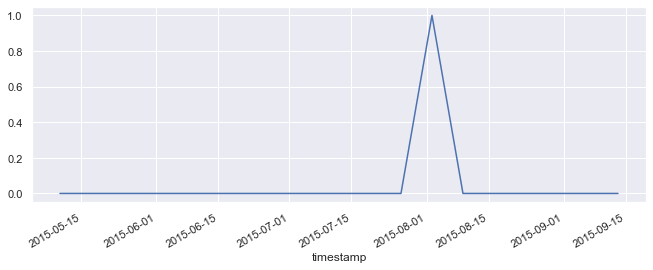

In [28]:
item_props[(item_props['itemid']==267142) &(item_props['property']=='available')]['value'].astype(int).plot(grid='True')

<AxesSubplot:xlabel='timestamp'>

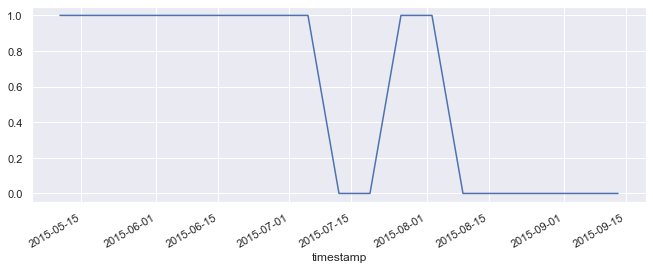

In [29]:
item_props[(item_props['itemid']==379701) &(item_props['property']=='available')]['value'].astype(int).plot(grid='True')

In [30]:
# item_props[(item_props['itemid']==267142) &(item_props['property']=='available')]['value']

item 267142 almost not available most of time it was available only once at 2015-08-02 05:00:00 in contrast to  item  379701 which was avaiable most  of time 

# Num of  unique properties per item

In [31]:
propertiesperitem=item_props.groupby(['itemid'])['property'].nunique()

In [32]:
propertiesperitem=propertiesperitem.to_frame( name="nuniqueproperty")

In [33]:
propertiesperitem

,nuniqueproperty
itemid,
0,28
1,35
2,24
3,29
4,25
...,...
466862,31
466863,23
466864,28


from the  below output we find that the  averaage  number of properties  per item amlost <b>28</b> and  max is  <b>59</b> and  min <b>12 </b>

In [34]:
propertiesperitem.describe()

,nuniqueproperty
count,417053.000000
mean,28.782466
std,7.409326
min,12.000000
25%,24.000000
50%,27.000000
75%,31.000000
max,59.000000


In [35]:
# item_props.groupby(['itemid','property'])['value'].nunique().to_frame(name='numofchanges').sort_values(by='numofchanges',ascending=False)

# Properties that are constant over time

In [36]:
valuesperproperty=item_props.groupby(['itemid','property'],as_index=False).agg({'value':{'count','nunique'}})

In [37]:
# valuesperproperty=valuesperproperty.reset_index()

In [38]:
valuesperproperty.columns = ["itemid","property","value_nunique","value_count"]

In [39]:
valuesperproperty[(valuesperproperty['value_nunique']==1)&(valuesperproperty['value_count']>1)]

,itemid,property,value_nunique,value_count


<b>Validating resullt by explore example of returned rows</b>
 <li> we can see rom the  below output /graph that the  value is the same  over time 
    

In [40]:
item_props[(item_props.itemid==40)&(item_props.property=='810')]

,itemid,property,value
timestamp,,,
2015-05-24 05:00:00,40,810,n180.000 424566
2015-05-31 05:00:00,40,810,n180.000 424566
2015-06-07 05:00:00,40,810,n180.000 424566
2015-06-14 05:00:00,40,810,n180.000 424566
2015-06-28 05:00:00,40,810,n180.000 424566
2015-07-05 05:00:00,40,810,n180.000 424566
2015-07-12 05:00:00,40,810,n180.000 424566
2015-07-19 05:00:00,40,810,n180.000 424566
2015-07-26 05:00:00,40,810,n180.000 424566


<AxesSubplot:>

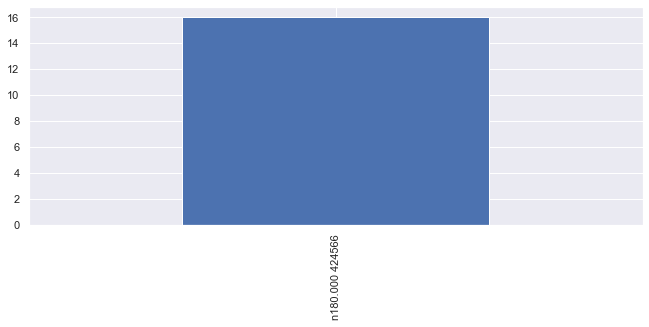

In [41]:
item_props[(item_props.itemid==40)&(item_props.property=='810')]['value'].value_counts().plot.bar(stacked=True)


<li> from the  below code we can find that there are <b>1104 </b> unique property that are  constant over time for some items
<li> also we  see that the count for some  property is the same of the number of unquie items so i think this properties may be  the meta data about every item like <b>descibtion or registerdate</b>  because every item have it
 <li> the  top of this properties are <b> 764,159,790,364 and 283

In [42]:
valuesperproperty.property.nunique()

1104

In [43]:
valuesperproperty.property.value_counts()

764     417053
159     417053
790     417053
364     417053
283     417053
         ...  
1091         1
1046         1
782          1
769          1
472          1
Name: property, Length: 1104, dtype: int64

In [44]:
item_props.itemid.nunique()

417053

<AxesSubplot:ylabel='property'>

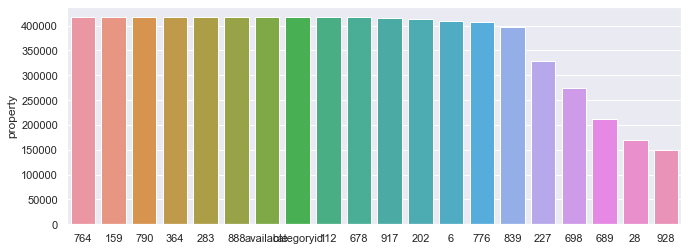

In [45]:
sn.barplot(x=valuesperproperty.property.value_counts().index[0:20], y=valuesperproperty.property.value_counts()[0:20])

# Snapshot merge

check the dublicated snapshot 
we have <b>7497165</b> dublicated rows of <B> 20275902 </b> which will reduce the data size  by <b> 40% </b> after droping it

In [46]:
item_props[item_props.duplicated(['itemid','property','value'])]

,itemid,property,value
timestamp,,,
2015-05-17 05:00:00,0,6,1152934 1238769
2015-05-17 05:00:00,1,790,n5760.000
2015-05-17 05:00:00,1,888,172646
2015-05-17 05:00:00,3,283,138228 150169 1182824 327918 261419
2015-05-17 05:00:00,4,888,371058 71429
...,...,...,...
2015-09-13 05:00:00,466864,790,n111840.000
2015-09-13 05:00:00,466864,813,1148082 353870 1262739
2015-09-13 05:00:00,466864,888,1262739 205682 1050016 1154859


Explore item <b>466864</b> with property <b>813</b> and value<b> '1148082 353870 1262739'</b> snapshots
from the below graph we note that this property had been changed once for this  item.

<AxesSubplot:xlabel='itemid,property'>

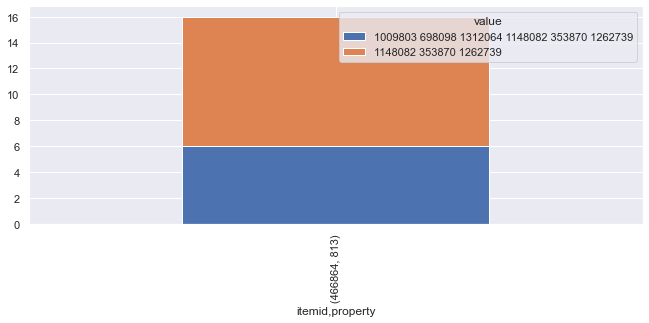

In [47]:
item1=item_props[(item_props.itemid==466864)&(item_props.property=='813')]
item1.groupby(['itemid','property'])['value'].value_counts().unstack().plot.bar(stacked=True)

let's drop the duplicates with consider keeping the last snapshot

In [48]:
item_props_merged=item_props.drop_duplicates(subset=['itemid','property','value'], keep='last')

In [49]:
item_props_merged.shape

(12778737, 3)

# Checking some items before and  after  snapshots merge

Before Merge

In [50]:
item_props[(item_props.itemid==91477)&(item_props.property=='888')]

,itemid,property,value
timestamp,,,
2015-05-10 05:00:00,91477,888,215907 409406
2015-05-17 05:00:00,91477,888,215907 409406
2015-05-24 05:00:00,91477,888,215907 409406
2015-05-31 05:00:00,91477,888,215907 409406
2015-06-07 05:00:00,91477,888,215907 409406
2015-06-14 05:00:00,91477,888,215907 409406
2015-06-28 05:00:00,91477,888,215907 409406
2015-07-05 05:00:00,91477,888,215907 409406
2015-07-12 05:00:00,91477,888,215907 409406


After merge

In [51]:
item_props_merged[(item_props_merged.itemid==91477)&(item_props_merged.property=='888')]

,itemid,property,value
timestamp,,,
2015-08-30 05:00:00,91477,888,215907 409406
2015-09-13 05:00:00,91477,888,215907 409406 726612 999696


Before merge 

In [52]:
item_props[(item_props.itemid==89439)&(item_props.property=='888')]

,itemid,property,value
timestamp,,,
2015-05-10 05:00:00,89439,888,390539 n24.000
2015-05-17 05:00:00,89439,888,390539 n24.000
2015-05-24 05:00:00,89439,888,390539 n24.000 1252796
2015-05-31 05:00:00,89439,888,390539 n24.000 1252796
2015-06-07 05:00:00,89439,888,390539 n24.000 1252796
2015-06-14 05:00:00,89439,888,390539 n24.000 1252796
2015-06-28 05:00:00,89439,888,390539 n24.000 1252796
2015-07-05 05:00:00,89439,888,390539 n24.000 1252796
2015-07-12 05:00:00,89439,888,390539 n24.000 1252796


In [53]:
item_props_merged[(item_props_merged.itemid==89439)&(item_props_merged.property=='888')]

,itemid,property,value
timestamp,,,
2015-05-17 05:00:00,89439,888,390539 n24.000
2015-09-13 05:00:00,89439,888,390539 n24.000 1252796


# Exploring  events data

<li>we have <b>2756101</b> row in event data  and <b>5 </b>columns
<li><b>1407580</b> unique vistior
<li><b>235061</b> unique items 
<li> <b>3 </b>types of events view,addtocart and transaction
<li> for the below  graph the most occured event is view by precentage <b> 96%</b> events. then addtocart and the lowest is transaction with  precentang <b>0.8% 
   

In [54]:
events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


Change timestamp to date-time format i tried to convert it directly but it gave me DateTime in the future so i divided the value by 1000 before converting it to be reasonable. maybe it's  wrong but I did this just to be  readable

In [55]:
events['timestamp']=events['timestamp'].apply( lambda x: datetime.fromtimestamp(x/1000))

In [56]:
events=events.set_index('timestamp')
events=events.sort_values(by='timestamp')

In [57]:
events.visitorid.nunique()

1407580

In [58]:
events.itemid.nunique()

235061

In [59]:
events.event.describe()

count     2756101
unique          3
top          view
freq      2664312
Name: event, dtype: object

<AxesSubplot:>

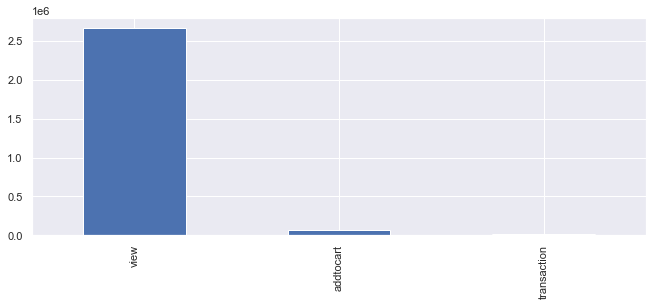

In [60]:
events.event.value_counts().plot.bar(stacked=True)

## Validating each row that has event type transaction have already transaction-id

In [61]:
events[(events.event=='transaction')&(events.transactionid.isna())]

,visitorid,event,itemid,transactionid
timestamp,,,,


In [62]:
events[events.event=='transaction']

,visitorid,event,itemid,transactionid
timestamp,,,,
2015-05-03 05:27:21.391,869008,transaction,40685,9765.0
2015-05-03 05:35:01.772,345781,transaction,438400,1016.0
2015-05-03 06:01:47.591,586756,transaction,440917,10942.0
2015-05-03 06:07:38.961,435495,transaction,175893,6173.0
2015-05-03 06:31:14.903,266417,transaction,445106,12546.0
...,...,...,...,...
2015-09-18 04:08:16.512,152963,transaction,12504,5772.0
2015-09-18 04:08:16.512,152963,transaction,72462,5772.0
2015-09-18 04:08:16.528,152963,transaction,380196,5772.0


#  Transcations per visitor

<li> number of visitors who are purchasing is <b>11719</b>
<li> the visitor who has more transactions is <b>1150086</b> he has <b>559</b>
<li> the  avg  number of transcation per  vistor  is  <b>~2 </b>and min  is  <b>1 </b> and  max is <b>559</b>

In [63]:
events[events.event=='transaction']['visitorid'].nunique()

11719

In [64]:
transpervistior=events[events.event=='transaction'].groupby('visitorid').agg({'transactionid':'count'})
transpervistior.columns=['totalnumtrans']

In [65]:
transpervistior=transpervistior.sort_values(by='totalnumtrans',ascending=False)

In [66]:
transpervistior

,totalnumtrans
visitorid,
1150086,559
152963,349
530559,286
684514,189
861299,188
...,...
535433,1
535446,1
535618,1


In [67]:
transpervistior.describe()

,totalnumtrans
count,11719.000000
mean,1.916290
std,8.850529
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,559.000000


<AxesSubplot:xlabel='visitorid', ylabel='totalnumtrans'>

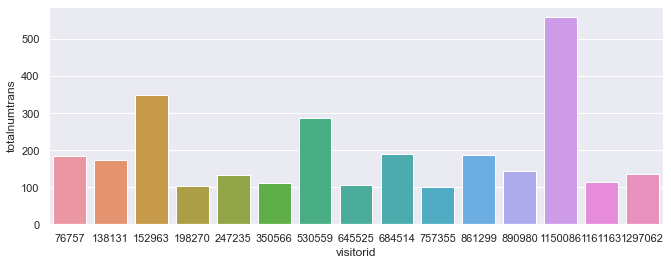

In [68]:
sn.barplot(x=transpervistior.index[0:15], y=transpervistior.totalnumtrans[0:15] )

# Items  per transaction

<li> max number of items  per transcation is <b>31</b> and min is <b>1</b> and avg is  almost also<b> 1 </b>
<li>total number  of items Purchased is highest in half of the months

In [69]:
itemspertrans=events.reset_index().groupby('transactionid',as_index=False).agg({'timestamp':lambda x:max(x),'itemid':['unique','count']})
itemspertrans.columns=['transactionid','timestamp','unique_items','totalnumitems']
itemspertrans=itemspertrans.sort_values(by='totalnumitems',ascending=False)

In [70]:
itemspertrans

,transactionid,timestamp,unique_items,totalnumitems
7063,7063.0,2015-05-14 20:05:25.163,"[238209, 262699, 108096, 447818, 265775, 25614...",31
765,765.0,2015-05-14 18:40:13.848,"[262699, 447818, 108096, 256146, 265775, 13059...",28
8351,8351.0,2015-09-11 17:04:05.760,"[277183, 412333, 4067, 86691, 256146, 380971, ...",27
2753,2753.0,2015-07-15 19:03:17.204,"[100898, 220513, 402816, 439963, 12836, 151471...",23
6993,6993.0,2015-08-13 21:37:26.043,"[238993, 339032, 260036, 20918, 283492, 107175...",21
...,...,...,...,...
6418,6418.0,2015-06-01 01:53:27.795,[25071],1
6419,6419.0,2015-05-27 21:58:47.900,[95598],1
6420,6420.0,2015-08-05 23:13:36.626,[67719],1
6421,6421.0,2015-05-17 02:59:13.897,[280946],1


In [71]:
itemspertrans.totalnumitems.describe()

count    17672.000000
mean         1.270767
std          0.974793
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         31.000000
Name: totalnumitems, dtype: float64

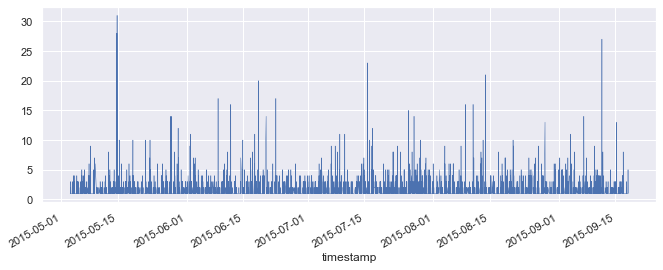

In [72]:
itemspertrans.set_index('timestamp')['totalnumitems'].plot(linewidth=0.5);

# Most Purchased items

<li> top pruchased item <b>461686</b> found  in <b>133</b> transcation

In [73]:
trasactions=events[events.event=='transaction']

In [74]:
trasactions

,visitorid,event,itemid,transactionid
timestamp,,,,
2015-05-03 05:27:21.391,869008,transaction,40685,9765.0
2015-05-03 05:35:01.772,345781,transaction,438400,1016.0
2015-05-03 06:01:47.591,586756,transaction,440917,10942.0
2015-05-03 06:07:38.961,435495,transaction,175893,6173.0
2015-05-03 06:31:14.903,266417,transaction,445106,12546.0
...,...,...,...,...
2015-09-18 04:08:16.512,152963,transaction,12504,5772.0
2015-09-18 04:08:16.512,152963,transaction,72462,5772.0
2015-09-18 04:08:16.528,152963,transaction,380196,5772.0


In [75]:
trasactions['itemid'].value_counts()

461686    133
119736     97
213834     92
7943       46
312728     46
         ... 
376944      1
279944      1
386126      1
313722      1
72462       1
Name: itemid, Length: 12025, dtype: int64

<AxesSubplot:ylabel='itemid'>

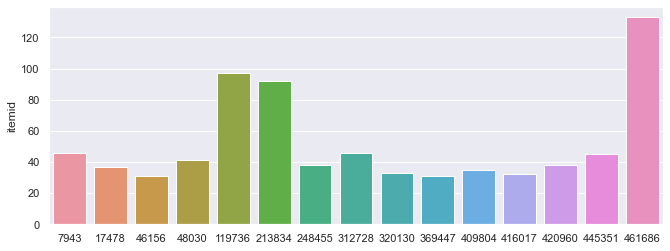

In [76]:
sn.barplot(x=trasactions.itemid.value_counts().index[0:15], y=trasactions.itemid.value_counts()[0:15] )

# Add to cart Events

<li> almost 2.5% of  events is add to cart type
 <li> highest addtocart item <b>461686</b> found  in <b>306</b> transcation which also highest purchased makesense
 <li> the below figure have  similar distribution to the above one of the purchased items because each item before being transaction it was addtocart

In [77]:
addtocart=events[events.event=='addtocart']
addtocart

,visitorid,event,itemid,transactionid
timestamp,,,,
2015-05-03 05:00:04.384,693516,addtocart,297662,NaN
2015-05-03 05:00:29.427,693516,addtocart,297662,NaN
2015-05-03 05:01:25.008,979664,addtocart,338222,NaN
2015-05-03 05:04:00.603,260113,addtocart,125751,NaN
2015-05-03 05:10:02.006,319455,addtocart,342530,NaN
...,...,...,...,...
2015-09-18 04:41:42.108,152963,addtocart,21970,NaN
2015-09-18 04:45:20.572,1108521,addtocart,134455,NaN
2015-09-18 04:45:22.842,1108521,addtocart,134455,NaN


In [78]:
addtocart['itemid'].value_counts()

461686    306
312728    162
409804    156
320130    141
29196     136
         ... 
409983      1
418099      1
32622       1
374135      1
38381       1
Name: itemid, Length: 23903, dtype: int64

<AxesSubplot:ylabel='itemid'>

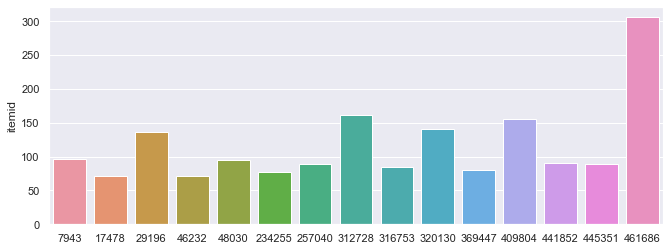

In [79]:
sn.barplot(x=addtocart.itemid.value_counts().index[0:15], y=addtocart.itemid.value_counts()[0:15] )

# Machine Learning applications


<li>Cross-selling using assoication rules 
<li>Demand Forecasting for items or forcasting  weekly sales using time series algorithms
<li>Customer Segmation using kmean cluster  and  RFM
<li> item category classifcation 

In [80]:
transcationevents=events.dropna()
transcationevents

,visitorid,event,itemid,transactionid
timestamp,,,,
2015-05-03 05:27:21.391,869008,transaction,40685,9765.0
2015-05-03 05:35:01.772,345781,transaction,438400,1016.0
2015-05-03 06:01:47.591,586756,transaction,440917,10942.0
2015-05-03 06:07:38.961,435495,transaction,175893,6173.0
2015-05-03 06:31:14.903,266417,transaction,445106,12546.0
...,...,...,...,...
2015-09-18 04:08:16.512,152963,transaction,12504,5772.0
2015-09-18 04:08:16.512,152963,transaction,72462,5772.0
2015-09-18 04:08:16.528,152963,transaction,380196,5772.0


# Associaciton Rule Learning



The association rules method is to present these correlations in the best way through
rules, if there are significant correlations between the items that occur simultaneously
and frequently, and if there are significant correlations. In other words, it is a
rule-based machine learning technique used to find patterns in data.
       
       - Apriori Algorithm -

It is a basket analysis method and is used to reveal product associations.

Support(X, Y) = Freq(X, Y) / N

There are 3 very simple formulas. The 1st is the Support value. It expresses the probability of
X and Y occurring together. It is the frequency of X and Y appearing together divided by N.

Confidence(X, Y) = Freq(X, Y) / Freq(X)

It expresses the probability of purchasing product Y when product X is purchased.
The frequency at which X and Y appear together divided by the frequency at which X appears.

Lift = Support(X, Y) / (Support(x) * Support (Y))

When X is purchased, the probability of buying Y increases by a multiple of lift.
The probability of X and Y appearing together is the product of the probabilities
of X and Y appearing separately.
It states an expression such as how many times the probability of buying another product
increases when we buy a product.

Our aim is to suggest products to users in the product purchasing process by
applying association analysis to the online retail II dataset.

# Build Transaction Dataset


In [81]:

    # We need to create below structure:

    # Rows represents transactions (transcation, shopping cart etc.), columns represents items
    # We simulate as binary that which transaction  contains which items
    # If the item is in the transcation, the intersection cell will be "1". If is not, it will be "0"

    # Description   Item1      Item2    Item3
    # trans
    # trans1          0         1         0
    # trans2          1         0         1
    # trans3          0         0         0
    # trans4          1         0         0
    # trans5          0         0         1


Extract Quantity of Item per transcation

In [82]:
transcationevents.reset_index().groupby(['transactionid','itemid']).agg({"timestamp": "count"}).rename(columns={'timestamp':'Quantity'}).sort_values('Quantity',ascending=False)

,,Quantity
transactionid,itemid,
2212.0,325772,4
3011.0,259147,3
12363.0,275354,3
15607.0,294438,3
4904.0,255725,3
...,...,...
5898.0,176162,1
5897.0,142756,1
5896.0,230911,1


Check  first item from  event  data will  find  4  rows  form same  item

In [83]:
events[(events.transactionid==2212.0)&(events.itemid==325772)]

,visitorid,event,itemid,transactionid
timestamp,,,,
2015-07-06 01:19:04.506,852251,transaction,325772,2212.0
2015-07-06 01:21:59.771,852251,transaction,325772,2212.0
2015-07-06 01:22:39.353,852251,transaction,325772,2212.0
2015-07-06 01:36:56.639,852251,transaction,325772,2212.0


In [84]:

items = list(transcationevents.itemid.unique())
grouped = transcationevents.groupby('transactionid')
transaction_level_df = grouped.aggregate(lambda x: tuple(x)).reset_index()[['transactionid','itemid']]

In [85]:
transaction_level_df

,transactionid,itemid
0,0.0,"(425758,)"
1,1.0,"(454430,)"
2,2.0,"(151855,)"
3,3.0,"(85842,)"
4,4.0,"(224184,)"
...,...,...
17667,17667.0,"(433567,)"
17668,17668.0,"(212289,)"
17669,17669.0,"(132418, 260256)"
17670,17670.0,"(461686,)"


In [86]:
# transaction_dict = {item:0 for item in items}
# output_dict = dict()
# temp = dict()
# for rec in transaction_level_df.to_dict('records'):
#     transactionid = rec['transactionid']
#     items_list = rec['itemid']
#     transaction_dict = {item:0 for item in items}
#     transaction_dict.update({item:1 for item in items if item in items_list})
#     temp.update({transactionid:transaction_dict})

# new = [v for k,v in temp.items()]
# tranasction_df = pd.DataFrame(new)
# del(tranasction_df[tranasction_df.columns[0]])

In [87]:

def create_transaction_item_df(df):
    return df.reset_index().groupby(['transactionid','itemid']).agg({"timestamp": "count"}).rename(columns={'timestamp':'Quantity'}).sort_values('Quantity',ascending=False).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

In [88]:
gr_tran_itm_df=create_transaction_item_df(transcationevents)

In [89]:
df=gr_tran_itm_df.copy()

In [90]:
df.columns=[ col[1] for col in df.columns]

In [91]:
df=df[list(trasactions.itemid.value_counts().index[0:1000])]

In [92]:
df.head()

,461686,119736,213834,7943,312728,445351,48030,248455,420960,17478,...,372941,254290,79956,416530,35278,242905,263385,29863,351397,187602
transactionid,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
gr_tran_itm_df.shape

(17672, 12025)

In [94]:
# 3. Possibilities of All Possible Item Combinations

# Support(X, Y) = Freq(X, Y) / N
# There are 3 very simple formulas. The 1st is the Support value. It expresses the probability of
# X and Y occurring together. It is the frequency of X and Y appearing together divided by N.

# Confidence(X, Y) = Freq(X, Y) / Freq(X)
# It expresses the probability of purchasing item Y when item X is purchased.
# The frequency at which X and Y appear together divided by the frequency at which X appears.

# Lift = Support(X, Y) / (Support(x) * Support (Y))
# When X is purchased, the probability of buying Y increases by a multiple of lift.
# The probability of X and Y appearing together is the item of the probabilities
# of X and Y appearing separately.
# It states an expression such as how many times the probability of buying another item
# increases when we buy a item.

In [95]:

frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

frequent_itemsets.sort_values("support", ascending=False).head()

,support,itemsets
0,0.007526,(461686)
1,0.005432,(119736)
2,0.005206,(213834)
3,0.002603,(7943)
4,0.002603,(312728)


In [96]:
# By inserting the support values we found with Apriori into the association_rules function,
# we find some other statistical data such as cofidance and lift.
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.001)

rules.sort_values("support", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(213834),(445351),0.005206,0.002546,0.002207,0.423913,166.475362,0.002194,1.731429
1,(445351),(213834),0.002546,0.005206,0.002207,0.866667,166.475362,0.002194,7.460955


 According to this table, the probability of 213834 item and product numbered 445351
appearing together is 0.002207. The probability of being bought together is 0.423913.
The increase in the probability of buying these two products together is 166.475362

# Forcasting weekly sales 

In [97]:
transcationevents["Week"]=transcationevents.index.isocalendar().week
transcationevents["Month"]=transcationevents.index.month

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# weekly_transcations=transcationevents.groupby(['Week','Month'],as_index=False).agg({"transactionid":'count'})

In [99]:
weekly_transcations=transcationevents.reset_index().groupby(['Week','Month'],as_index=False).agg({"transactionid":'count','timestamp':lambda x:x.max()})

In [100]:
# transcationevents.resample('W').mean().

In [101]:
weekly_transcations.columns=['Week','Month','Num_trans','timestamp']

weekly_transcations

,Week,Month,Num_trans,timestamp
0,18,5,68,2015-05-03 23:54:04.483
1,19,5,1111,2015-05-10 23:36:29.779
2,20,5,1208,2015-05-17 23:59:19.929
3,21,5,1067,2015-05-24 23:45:36.022
4,22,5,1140,2015-05-31 23:39:50.544
5,23,6,1178,2015-06-07 23:57:48.138
6,24,6,969,2015-06-14 23:45:02.327
7,25,6,1316,2015-06-21 23:49:10.247
8,26,6,1218,2015-06-28 23:48:26.851
9,27,6,357,2015-06-30 23:59:35.698


In [102]:
weekly_transcations=weekly_transcations.set_index('timestamp').resample('W').mean()

In [103]:
weekly_transcations

,Week,Month,Num_trans
timestamp,,,
2015-05-03,18.0,5.0,68.0
2015-05-10,19.0,5.0,1111.0
2015-05-17,20.0,5.0,1208.0
2015-05-24,21.0,5.0,1067.0
2015-05-31,22.0,5.0,1140.0
2015-06-07,23.0,6.0,1178.0
2015-06-14,24.0,6.0,969.0
2015-06-21,25.0,6.0,1316.0
2015-06-28,26.0,6.0,1218.0


# Visual  weekly Sales time series

<AxesSubplot:xlabel='Week'>

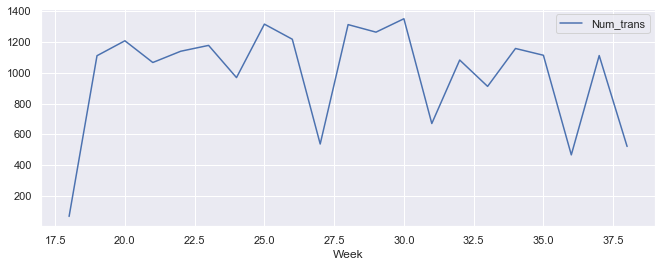

In [104]:
weekly_transcations.groupby('Week').agg({'Num_trans':'sum'}).plot()

<AxesSubplot:xlabel='Week', ylabel='Num_trans'>

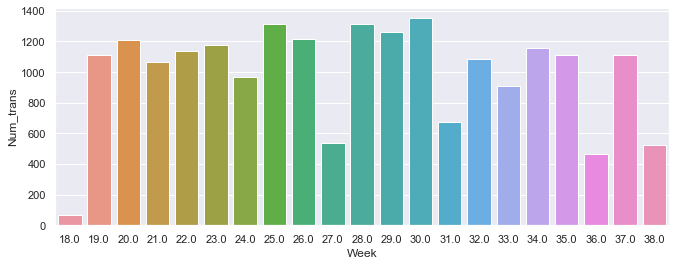

In [105]:
sn.barplot(x=weekly_transcations['Week'], y=weekly_transcations['Num_trans'] )

# Decomposing

Seasonal Decompose gives the decomposition of the time series into its estimated trend component, estimated seasonal component, and estimated residual. We can also plot the original data to look at what components of the data influence its true value the most.

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [107]:
# weekly_transcations.sort_index(inplace=True)

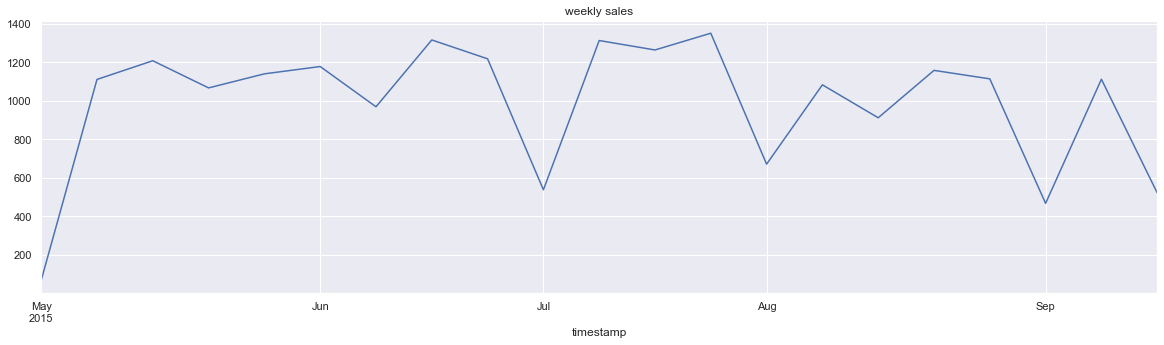

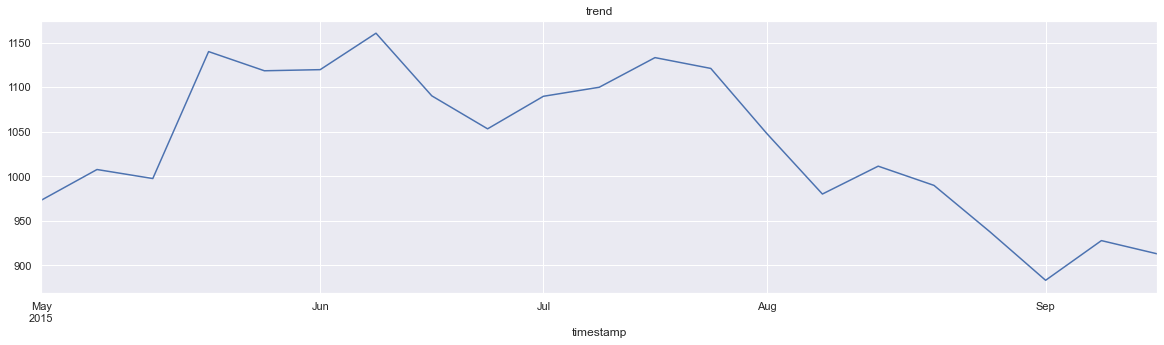

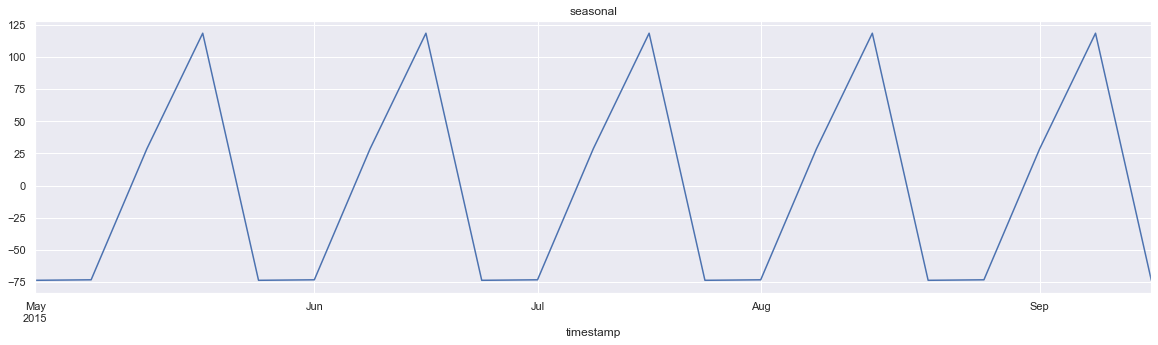

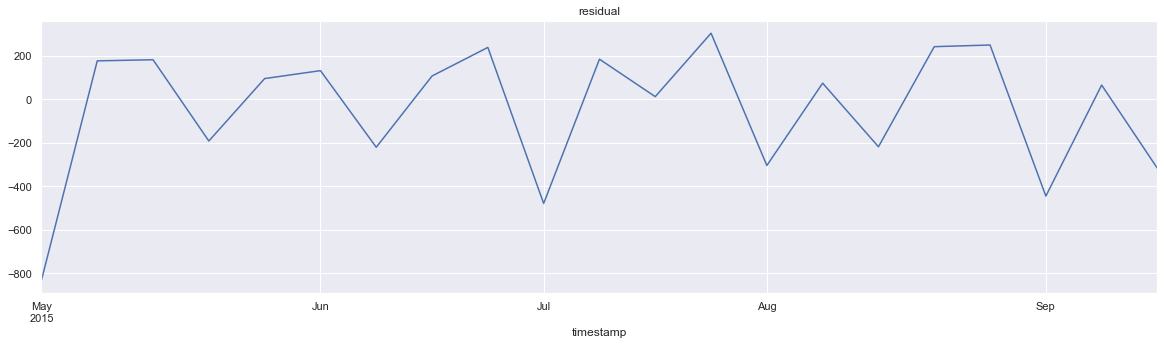

In [108]:
multi_plot = seasonal_decompose(weekly_transcations['Num_trans'], model = 'add', extrapolate_trend='freq', period=4)

plt.figure(figsize=(20,5))
multi_plot.observed.plot(title = 'weekly sales')

plt.figure(figsize=(20,5))
multi_plot.trend.plot(title = 'trend')

plt.figure(figsize=(20,5))
multi_plot.seasonal.plot(title = 'seasonal')

plt.figure(figsize=(20,5))
multi_plot.resid.plot(title = 'residual');

# Forecasting using ARIMA Model


In [109]:
import statsmodels.api as sm
from math import sqrt


In [110]:
weekly_transcations

,Week,Month,Num_trans
timestamp,,,
2015-05-03,18.0,5.0,68.0
2015-05-10,19.0,5.0,1111.0
2015-05-17,20.0,5.0,1208.0
2015-05-24,21.0,5.0,1067.0
2015-05-31,22.0,5.0,1140.0
2015-06-07,23.0,6.0,1178.0
2015-06-14,24.0,6.0,969.0
2015-06-21,25.0,6.0,1316.0
2015-06-28,26.0,6.0,1218.0


 We will fit an ARIMA model to the entire weekly_transcations dataset and review the residual errors.
First, we fit an ARIMA(1,1,0) model. This sets the lag value to 1 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

                               SARIMAX Results                                
Dep. Variable:              Num_trans   No. Observations:                   21
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -148.503
Date:                Fri, 31 Dec 2021   AIC                            301.006
Time:                        18:35:35   BIC                            302.998
Sample:                    05-03-2015   HQIC                           301.395
                         - 09-20-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5533      0.170     -3.259      0.001      -0.886      -0.221
sigma2      1.602e+05   5.13e+04      3.121      0.002    5.96e+04    2.61e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

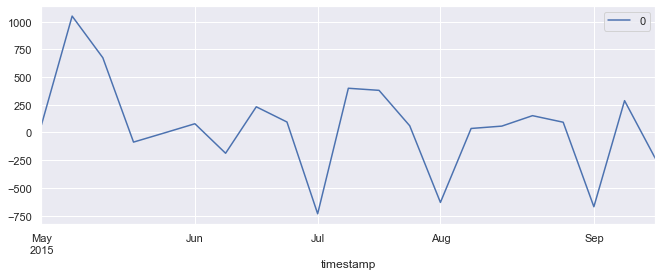

In [111]:
# fit model
model =sm.tsa.ARIMA(weekly_transcations['Num_trans'], order=(1,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# plt.show()
# # summary stats of residuals
# print(residuals.describe())

# Split data to train and  test and  get  RMSE

Running the example prints the prediction and expected value each iteration.

We can also calculate a final root mean squared error score (RMSE) for the predictions

A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.



predicted=1322.549499, expected=671.000000
predicted=912.161919, expected=1083.000000
predicted=912.998484, expected=912.000000
predicted=983.248073, expected=1158.000000
predicted=1051.624078, expected=1114.000000
predicted=1132.876437, expected=467.500000
predicted=733.593378, expected=1112.000000
predicted=790.378490, expected=522.000000
Test RMSE: 378.496


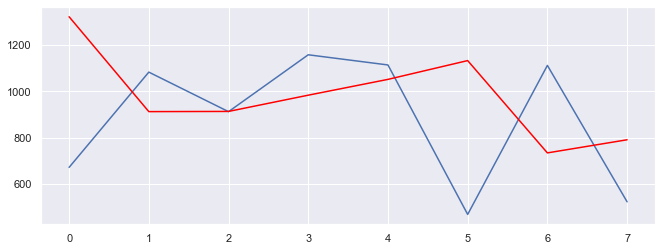

In [112]:
from sklearn.metrics import mean_squared_error
# split into train and test sets
X = weekly_transcations.Num_trans.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [113]:
!nbmerge "revision-Task.ipynb" "Customer segmentation.ipynb"  >all_.ipynb

# Customer Segmentation with RFM & K-Means

In [114]:
import pandas as pd

from datetime import datetime

# Display figures inline in Jupyter notebook
import matplotlib.pyplot as plt
import seaborn as sn
# Use seaborn style defaults and set the default figure size
sn.set(rc={'figure.figsize':(11, 4)})
import warnings
warnings.filterwarnings('ignore')

In [115]:
events=pd.read_csv('events.csv')

# Data Perpartion

In [116]:
events['timestamp']=events['timestamp'].apply( lambda x: datetime.fromtimestamp(x/1000))

In [117]:
events

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 07:02:12.117,257597,view,355908,NaN
1,2015-06-02 07:50:14.164,992329,view,248676,NaN
2,2015-06-02 07:13:19.827,111016,view,318965,NaN
3,2015-06-02 07:12:35.914,483717,view,253185,NaN
4,2015-06-02 07:02:17.106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,2015-08-01 05:13:05.939,591435,view,261427,NaN
2756097,2015-08-01 05:30:13.142,762376,view,115946,NaN
2756098,2015-08-01 04:57:00.527,1251746,view,78144,NaN
2756099,2015-08-01 05:08:50.703,1184451,view,283392,NaN


In [118]:
events.dtypes

timestamp        datetime64[ns]
visitorid                 int64
event                    object
itemid                    int64
transactionid           float64
dtype: object

In [119]:
df=events.copy()

In [120]:
df.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [121]:
df.dropna(inplace = True)
df.isnull().sum()

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64

In [122]:
df.shape

(22457, 5)

In [123]:
df.describe([0.05,0.01,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,80%,90%,95%,99%,max
visitorid,22457.0,700481.127488,403657.194682,172.0,17676.00,76757.0,346597.0,712121.0,1062424.0,1133097.0,1245921.4,1322803.4,1385073.0,1407398.0
itemid,22457.0,236566.088614,134810.094990,15.0,4582.68,23221.8,120114.0,238804.0,352115.0,374962.0,422905.0,445776.8,461710.0,466861.0
transactionid,22457.0,8826.497796,5098.996290,0.0,181.56,887.8,4411.0,8813.0,13224.0,14104.8,15880.4,16819.0,17496.0,17671.0


In [124]:
max(df.timestamp)

Timestamp('2015-09-18 04:43:12.017000')

# Recency, Frequency & Monetary value calculation


we’ll calculate is the three key factors of RFM Analysis (recency, frequency, and monetary).
<br>
<b>Recency</b>: How recently customers made their purchase.<br>
<b>Frequency</b>: For simplicity, we’ll count the number of times each customer made a purchase.
<br>
<b>Monetary</b>: How much money they spent in total.
<br>
We are going to calculate these three key factors by grouping them by customers and taking <b>“2015/09/18”</b> as our reference end date since this is the last transaction date listed in our dataset.

In [125]:
# Recency   = Overall latest invoice date - individual customer's last invoice date
# Frequency = count of invoice no. of transaction(s)
# Monetary = Sum of Total amount for each cutomer

# Set 2015/09/18 as the overall last transcation date. This is to calculate recency in days.


In [126]:
df

,timestamp,visitorid,event,itemid,transactionid
130,2015-06-02 07:17:56.276,599528,transaction,356475,4000.0
304,2015-06-01 23:18:20.981,121688,transaction,15335,11117.0
418,2015-06-01 23:25:15.008,552148,transaction,81345,5444.0
814,2015-06-01 18:38:56.375,102019,transaction,150318,13556.0
843,2015-06-01 18:01:58.180,189384,transaction,310791,7244.0
...,...,...,...,...,...
2755294,2015-07-31 23:12:56.570,1050575,transaction,31640,8354.0
2755349,2015-07-31 23:57:58.779,861299,transaction,456602,3643.0
2755508,2015-07-31 17:48:50.123,855941,transaction,235771,4385.0
2755603,2015-07-31 17:12:40.300,548772,transaction,29167,13872.0


In [127]:
#Recency Metric
import datetime as dt
today_date = dt.datetime(2021,12,30)
temp_df = (today_date - df.groupby("visitorid").agg({"timestamp":"max"}))
temp_df.rename(columns={"timestamp": "Recency"}, inplace = True)
recency_df = temp_df["Recency"].apply(lambda x: x.days)
# Frequency Metric
temp_df = df.groupby(["visitorid","transactionid"]).agg({"transactionid":"count"})
freq_df = temp_df.groupby("visitorid").agg({"transactionid":"count"})
freq_df.rename(columns={"transactionid": "Frequency"}, inplace = True)

# Monetary Metric
## it should be  item price but i dont have this  feild on data

monetary_df = df.groupby("visitorid").agg({"itemid":"sum"})
monetary_df.rename(columns = {"itemid": "Monetary"}, inplace = True)
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)


In [128]:
df = rfm
df["RecencyScore"] = pd.qcut(df['Recency'], 5, labels = [5, 4, 3, 2, 1])
df["FrequencyScore"] = pd.qcut(df['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
df["MonetaryScore"] = pd.qcut(df['Monetary'], 5, labels = [1,2,3,4,5])
df["RFM_SCORE"] = df['RecencyScore'].astype(str) + df['FrequencyScore'].astype(str) + df['MonetaryScore'].astype(str)
seg_map = {
        r'[1-2][1-2]': 'Hibernating',
        r'[1-2][3-4]': 'At Risk',
        r'[1-2]5': 'Can\'t Loose',
        r'3[1-2]': 'About to Sleep',
        r'33': 'Need Attention',
        r'[3-4][4-5]': 'Loyal Customers',
        r'41': 'Promising',
        r'51': 'New Customers',
        r'[4-5][2-3]': 'Potential Loyalists',
        r'5[4-5]': 'Champions'
}

df['Segment'] = df['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
df['Segment'] = df['Segment'].replace(seg_map, regex=True)
df.head()



,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
visitorid,,,,,,,,
172,2328,1,475556,4,1,5,415,Promising
186,2331,1,49029,4,1,1,411,Promising
264,2305,1,621784,5,1,5,515,New Customers
419,2345,1,19278,4,1,1,411,Promising
539,2388,1,94371,2,1,1,211,Hibernating


In [129]:
rfm = df.loc[:,"Recency":"Monetary"]

In [130]:
df.groupby("visitorid").agg({"Segment": "sum"}).head()


,Segment
visitorid,
172,Promising
186,Promising
264,New Customers
419,Promising
539,Hibernating


# Explore the RFM values


once we have every visitor’s individual recency, frequency, and monetary value calculated, we’d like to see the distribution graph to understand the data better.

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

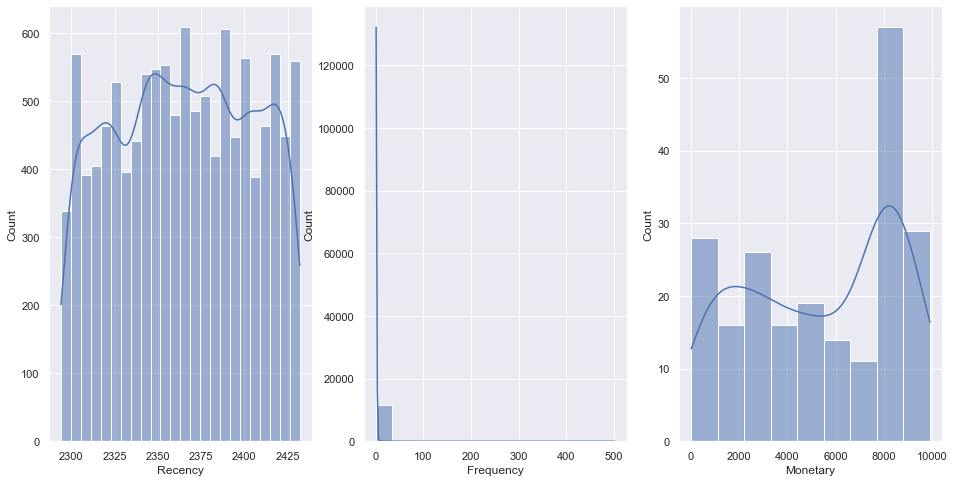

In [131]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Recency distribution plot
sn.histplot(rfm['Recency'], kde=True, ax=ax[0])

# Frequency distribution plot
sn.histplot(rfm.query('Frequency < 1000')['Frequency'], kde=True, ax=ax[1])

# Monetary distribution plot
sn.histplot(rfm.query('Monetary < 10000')['Monetary'], kde=True, ax=ax[2])

In [132]:
df

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
visitorid,,,,,,,,
172,2328,1,475556,4,1,5,415,Promising
186,2331,1,49029,4,1,1,411,Promising
264,2305,1,621784,5,1,5,515,New Customers
419,2345,1,19278,4,1,1,411,Promising
539,2388,1,94371,2,1,1,211,Hibernating
...,...,...,...,...,...,...,...,...
1406787,2403,1,336832,2,5,3,253,Can't Loose
1406981,2416,1,436004,1,5,4,154,Can't Loose
1407070,2421,1,215596,1,5,2,152,Can't Loose


# Clustering with the K-Means Algorithm


In [133]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [134]:
#scale
sc = MinMaxScaler((0,1))
df = sc.fit_transform(rfm)

#Kmeans
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(df)

In [135]:
k_fit.n_clusters

10

In [136]:
k_fit.cluster_centers_

array([[9.55339194e-01, 3.31159983e-04, 2.72321896e-03],
       [3.43601204e-01, 5.49583794e-04, 3.04244433e-03],
       [6.51485534e-01, 6.29632685e-04, 3.03805874e-03],
       [7.41322452e-02, 1.19005743e-03, 3.85068126e-03],
       [8.59395075e-01, 6.73053231e-04, 3.05262279e-03],
       [5.46085792e-01, 4.71346464e-04, 2.99596562e-03],
       [2.09620519e-01, 6.10620864e-04, 3.13547835e-03],
       [7.58668053e-01, 1.07667747e-03, 3.64626006e-03],
       [4.46163173e-01, 7.71365635e-04, 3.48275891e-03],
       [2.97906602e-01, 4.01197605e-01, 4.48952552e-01]])

In [137]:
k_fit.labels_ 

array([6, 6, 3, ..., 0, 1, 5])

In [138]:
df[0:5]

array([[2.46376812e-01, 0.00000000e+00, 3.74502469e-03],
       [2.68115942e-01, 0.00000000e+00, 3.85928972e-04],
       [7.97101449e-02, 0.00000000e+00, 4.89663724e-03],
       [3.69565217e-01, 0.00000000e+00, 1.51626204e-04],
       [6.81159420e-01, 0.00000000e+00, 7.43018014e-04]])

# Determining the Optimum Number of Clusters


Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

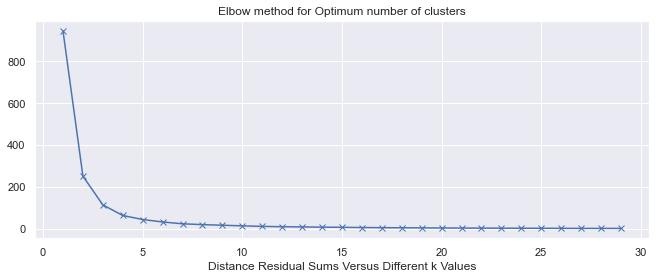

In [139]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
ssd = []  

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters")

In [140]:
# !pip install yellowbrick

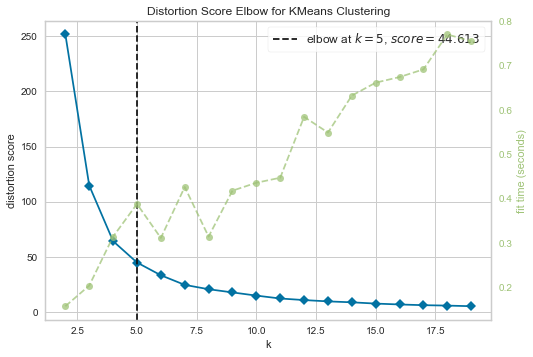

In [141]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof();

In [142]:
kmeans = KMeans(n_clusters = 6).fit(df)
cluster = kmeans.labels_
pd.DataFrame({"VistiorID": rfm.index, "cluster": cluster})

,VistiorID,cluster
0,172,5
1,186,5
2,264,2
3,419,0
4,539,4
...,...,...
11714,1406787,1
11715,1406981,3
11716,1407070,3
11717,1407110,5
